# Projeto Ligações 911, Montgomey County, PA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Importar os arquivos e coloca-los em um dataframe
df = pd.read_csv('../arquivos/911.csv')

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Análise Exploratória de Dados (AED)

## Quais são os top 5 CEPs nas chamadas 911?

In [24]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## Quais são os 5 principais municipios nas chamadas 911?

In [26]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Quantas chamadas foram feitas para os Bombeiros?
## Quantas chamadas foram feitas para os Paramédicos?
## Quantas chamadas foram feitas para os Agentes de Trânsito?

In [43]:
def department(string):
    lista = string.split(':')
    return lista[0]


df['title'].apply(department).value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

## Criar uma nova coluna com os departamentos chamados

In [51]:
df['Department'] = df['title'].apply(lambda title: title.split(':')[0])

## Qual é o motivo mais comun para uma chamada 911

In [56]:
def reason(string):
    lista = string.split(':')
    return lista[1]


df['title'].apply(reason).value_counts().head(1)

 VEHICLE ACCIDENT -    23066
Name: title, dtype: int64

# Modelagem de Dados

## Passar o tipo da coluna 'timeStamp' de string para Date

In [57]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [60]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## Utilizar o método do Jupyter (Tab) para extrair informações da coluna 'timeStamp' e criar novas colunas com a informação

In [63]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [64]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [75]:
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Department   99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


## Usar a função .map() para mudar os dias da semana de números para strings

In [73]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [78]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [80]:
df['Day of Week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

# Visualização de Dados

<AxesSubplot:xlabel='Department', ylabel='count'>

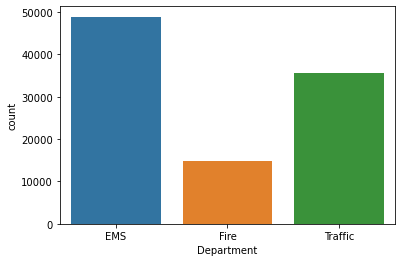

In [83]:
sns.countplot(x='Department', data=df)

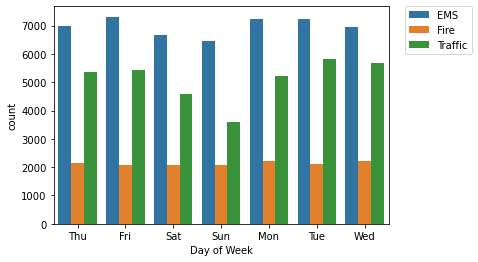

In [87]:
sns.countplot(x='Day of Week',  hue='Department',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

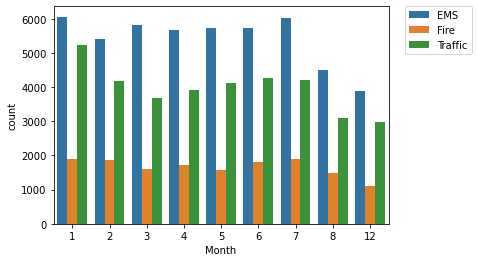

In [88]:
sns.countplot(x='Month',  hue='Department',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)